In [ ]:
#training model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("data/synthetic_with_risks.csv")

features = [
    "ph",
    "turbidity",
    "orp",
    "rainfall",
    "diarrhea",
    "vomiting",
    "fever"
]

df = df.dropna(subset=features + ["status"])

X = df[features]
y = df["status"]

le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.25,
    random_state=42,
    stratify=y_enc
)

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(
    le.inverse_transform(y_test),
    le.inverse_transform(y_pred)
))

              precision    recall  f1-score   support

       GREEN       0.94      1.00      0.97        16
         RED       1.00      1.00      1.00         3
      YELLOW       1.00      0.96      0.98        26

    accuracy                           0.98        45
   macro avg       0.98      0.99      0.98        45
weighted avg       0.98      0.98      0.98        45



In [2]:
#feature importance 
import pandas as pd

importance = pd.Series(
    model.feature_importances_,
    index=features
).sort_values(ascending=False)

importance

diarrhea     0.330307
rainfall     0.180053
turbidity    0.174440
vomiting     0.122521
ph           0.090974
orp          0.078761
fever        0.022944
dtype: float64

<Axes: title={'center': 'Feature importance (ML model)'}>

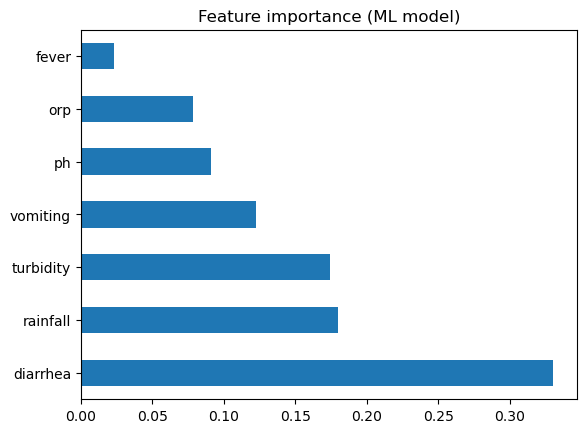

In [3]:
importance.plot(kind="barh", title="Feature importance (ML model)")

The machine learning model is trained using weak labels generated by the rule-based risk engine due to the absence of real historical ground-truth data.

In [ ]:
#final dataset
import pandas as pd

df["ml_status"] = le.inverse_transform(model.predict(X))

df.to_csv("data/synthetic_with_ml_status.csv", index=False)

print("data/Saved synthetic_with_ml_status.csv")


df = pd.read_csv("data/synthetic_with_ml_status.csv")

df.head()

Saved synthetic_with_ml_status.csv


,village_id,date,ph,turbidity,orp,rainfall,true_diarrhea,true_vomiting,true_fever,report_text,...,fever,suspected_source,total_risk,status,r_ph,r_turb,r_orp,r_rain,r_health,ml_status
0,V1,2025-01-01,7.00,1.84,361.2,5.9,1,2,0,Today 1 people have loose motions and 2 are vo...,...,0,handpump,0.331818,YELLOW,0.0,0.1,0.1,0.4,0.772727,YELLOW
1,V1,2025-01-02,6.87,3.46,388.0,2.4,0,1,0,Field worker noticed 0 diarrhea cases and 0 fe...,...,0,pond,0.055000,GREEN,0.0,0.1,0.1,0.1,0.000000,GREEN
2,V1,2025-01-03,6.90,2.10,452.4,3.6,0,1,0,0 persons reported diarrhea and 1 vomiting tod...,...,0,pond,0.286818,YELLOW,0.0,0.1,0.1,0.1,0.772727,YELLOW
3,V1,2025-01-04,6.87,3.50,387.9,7.7,0,1,0,Today 0 people have loose motions and 1 are vo...,...,0,pond,0.195455,GREEN,0.0,0.1,0.1,0.4,0.318182,GREEN
4,V1,2025-01-05,6.89,2.10,299.4,0.3,1,0,4,Today 1 people have loose motions and 0 are vo...,...,0,handpump,0.331818,YELLOW,0.0,0.1,0.4,0.1,0.772727,YELLOW


In [6]:
#distribution of statuses
print("Rule-based status distribution:")
print(df["status"].value_counts())

print("\nML predicted status distribution:")
print(df["ml_status"].value_counts())

Rule-based status distribution:
YELLOW    103
GREEN      66
RED        11
Name: status, dtype: int64

ML predicted status distribution:
YELLOW    102
GREEN      67
RED        11
Name: ml_status, dtype: int64


In [7]:
# agreement between rule and ML.
df["status_match"] = df["status"] == df["ml_status"]

df["status_match"].value_counts()


True     179
False      1
Name: status_match, dtype: int64

In [8]:
df[["total_risk", "status", "ml_status"]].head(10)

,total_risk,status,ml_status
0,0.331818,YELLOW,YELLOW
1,0.055000,GREEN,GREEN
2,0.286818,YELLOW,YELLOW
3,0.195455,GREEN,GREEN
4,0.331818,YELLOW,YELLOW
5,0.195455,GREEN,GREEN
6,0.150455,GREEN,GREEN
7,0.236364,GREEN,GREEN
8,0.355000,YELLOW,YELLOW
9,0.384614,YELLOW,YELLOW
